### Лабораторная работа 2: основные понятия

В сегодняшней лабораторной будем работать с данными о проданных на аукционе автомобилях (`Carvana Car Prediction`). Целевым признаком здесь является наличие скрытых продавцом существенных недостатков. 

Carvana &mdash; компания-перекупщик автомобилей, соответственно, ее задача &mdash; не допустить скупку автомобилей со скрытыми недостатками, так как их впоследствии тяжелее продавать.

## 1

Загрузите данные о проданных на аукционе автомобилях. Посмотрите на "сырые" данные. 

Просмотрите файл `DataDictionary-ru.txt` и поймите, что означают столбцы матрицы. Выведите статистику по столбцам.


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\user\Desktop\Машинное обучение\lab2\data.csv')
data.tail(5)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,...,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,...,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,...,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,...,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974
72982,73014,0,12/2/2009,ADESA,2006,3,MAZDA,MAZDA6,s,4D SEDAN S,...,11954.0,13246.0,NaN,NaN,18111,30212,GA,8000.0,0,1313


## 2

Постройте график рассеяния с пробегом в качестве оси абсцисс и ценой `MMRCurrentRetailAveragePrice` в качестве оси ординат. Автомобили без недостатков отметьте зеленым цветом, со скрытыми недостатками — красным.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

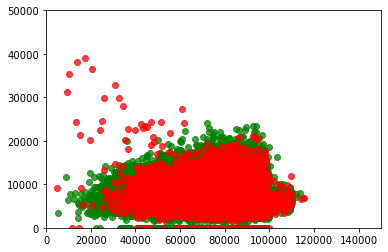

In [4]:
isGood=data['IsBadBuy']==0
isBad=data['IsBadBuy']==1

x1=data.loc[isGood,'VehOdo']
y1=data.loc[isGood,'MMRCurrentRetailAveragePrice']

x2=data.loc[isBad,'VehOdo']
y2=data.loc[isBad,'MMRCurrentRetailAveragePrice']

fig,ax =plt.subplots()

plt.xlim([0,150000])
plt.ylim([0,50000])

ax.scatter(x1,y1,alpha=0.75 , color="green")
ax.scatter(x2,y2,alpha=0.75,color="red")
plt.show()

# Регрессия

## 3a

Импортируйте из библиотеки `sklearn` все модели машинного обучения:

`from sklearn import *`

Трактуя задачу о предсказании наличия недостатков как задачу регрессии, натренируйте линейную модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на каком-нибудь подмножестве признаков (например, тех же `VehOdo` и `MMRCurrentRetailAveragePrice`). 

С какой проблемой вы столкнулись? Какие способы ее решения вы можете предложить?

*Функции, которые могут пригодиться при решении: `.fit(), .loc[], pd.notnull()`*

*Создание модели:* `model1 = linear_model.LinearRegression()`

*Тренировка:*
`model1.fit(x, y)`



In [5]:
from sklearn import *
isNotNull= pd.notnull(data['MMRCurrentRetailAveragePrice'])

x = data.loc[isNotNull,['VehOdo','MMRCurrentRetailAveragePrice']]
y = data.loc[isNotNull,'IsBadBuy']

model = linear_model.LinearRegression()
#model = linear_model.LinearRegression(data['VehOdo'], data['MMRCurrentRetailAveragePrice'])
model.fit(x,y)

LinearRegression()

## 3b

Выполните предсказание для всех объектов обучающей выборки и присвойте результат переменной prediction

*Функции, которые могут пригодиться при решении: `model.predict()`*

In [6]:
# место для кода
model.predict(x)
prediction=model.predict(x)
len(prediction)

72668

## 3c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Это можно сделать, например, используя list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [7]:
predictionClass=[1 if prediction[i]>0.15 else 0 for i in range(prediction.shape[0])]
predictionClass

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,


## 3d

Постройте отчет по качеству классификации и матрицу ошибок. Как изменятся отчет и матрица ошибок, если изменить порог в задании 3c (по умолчанию его значение равно 0.5)?

*Функции, которые могут пригодиться при решении: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функция classification_report для каждого класса объектов считает точность (precision) в этом классе и полноту (recall). Полнота - это процент объектов данного класса, которые ваш метод предсказания тоже отнес к этому классу, среди всех объектов данного класса. Точность (precision) - то же самое, только среди всех объектов, предсказанных для этого класса.

Функция confusion_matrix возвращает матрицу с количествами объектов. Номера столбцов матрицы - это номера предсказанных классов, строки - это номера правильных классов. Например, элемент M[0,1] - это количество машин, где на самом деле IsBadBuy = 0, а вы предсказали 1.

In [8]:
y_true=data.loc[isNotNull,'IsBadBuy']
y_pred=predictionClass
print(metrics.classification_report(y_true,y_pred))
print(metrics.confusion_matrix(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82     63724
           1       0.19      0.41      0.26      8944

    accuracy                           0.71     72668
   macro avg       0.54      0.58      0.54     72668
weighted avg       0.81      0.71      0.75     72668

[[47606 16118]
 [ 5236  3708]]


# Классификация

## 4a
Трактуя задачу как задачу классификации, постройте модель классификации «решающее дерево» глубины 20  (все аналогично линейной регрессии).


*Функции, которые могут пригодиться при решении: `tree.DecisionTreeClassifier(max_depth=20) `*

In [9]:
# место для кода
model=tree.DecisionTreeClassifier(max_depth=20)
model.fit(x,y)
prediction=model.predict(x)
predictionClass=[1 if prediction[i]>0.0001 else 0 for i in range(prediction.shape[0])]
y_true=data.loc[isNotNull,'IsBadBuy']

y_pred=predictionClass
print(metrics.classification_report(y_true,y_pred))
print(metrics.confusion_matrix(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     63724
           1       0.96      0.31      0.47      8944

    accuracy                           0.91     72668
   macro avg       0.94      0.65      0.71     72668
weighted avg       0.92      0.91      0.89     72668

[[63619   105]
 [ 6183  2761]]


## 4b

Решающее дерево предсказывает вероятности. С помощью построенной модели рассчитайте вероятности наличия скрываемых недостатков.

*Функции, которые могут пригодиться при решении: `model.predict_proba() `*

In [10]:
# место для кода
prediction = model.predict_proba(x)
prediction

array([[0.89317804, 0.10682196],
       [1.        , 0.        ],
       [0.85810056, 0.14189944],
       ...,
       [0.89317804, 0.10682196],
       [0.86746988, 0.13253012],
       [0.93789474, 0.06210526]])

## 4c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Постройте отчет о классификации и матрицу ошибок. Какой метод оказался лучше?

In [11]:
prediction=model.predict(x)
prediction
predictionClass=[1 if prediction[i]>0.0001 else 0 for i in range(prediction.shape[0])]
predictionClass

y_true=data.loc[isNotNull,'IsBadBuy']
y_pred=predictionClass
print(metrics.classification_report(y_true,y_pred))
print(metrics.confusion_matrix(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     63724
           1       0.96      0.31      0.47      8944

    accuracy                           0.91     72668
   macro avg       0.94      0.65      0.71     72668
weighted avg       0.92      0.91      0.89     72668

[[63619   105]
 [ 6183  2761]]


# Кросс-валидация
## 5a


Разделите исходную выборку на две части, например, используя [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [12]:
# место для кода
dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]

## 5b

Натренируйте решающее дерево на  `dataTrain` и примените к  `dataTrain` и dataTest, вычислив для каждого случая точность предсказания. 

Проведите несколько экспериментов для различных глубин дерева. Напишите в комментариях, для каких глубин модель недообучена, для каких переобучена и где точка раннего останова.

*Функции, которые могут пригодиться при решении: `metrics.accuracy_score() `*

In [13]:
# место для кода
x=dataTrain.loc[isNotNull,['VehOdo','MMRCurrentRetailAveragePrice']]
y=dataTrain.loc[isNotNull,'IsBadBuy']

model=tree.DecisionTreeClassifier(max_depth=20)
model.fit(x,y)

prediction=model.predict(x)
predictionClass=[1 if prediction[i]>0.0001 else 0 for i in range(prediction.shape[0])]
y_true=dataTrain.loc[isNotNull,'IsBadBuy']

y_pred=predictionClass
metrics.accuracy_score(y_true,y_pred)

0.9325816909085693

# Решающая функция
## 6a

Вернемся к модели решающего дерева глубины 20, построенного по всей обучающей выборке `data`. Пусть цена ошибки неправильного предсказания 0 равна 1000, а неправильного предсказания 1 — 100.

Вычислите функцию потерь &mdash; среднюю ошибку на всей обучающей выборке.

In [14]:
model=tree.DecisionTreeClassifier(max_depth=20)
x = data.loc[isNotNull,['VehOdo','MMRCurrentRetailAveragePrice']]
y = data.loc[isNotNull,'IsBadBuy']
model.fit(x,y)

prediction= model.predict(x)
predictionClass=[1 if prediction[i]>0.00001 else 0 for i in range(prediction.shape[0])]

y_true=data.loc[isNotNull,'IsBadBuy']

y_pred=predictionClass

confusionMatrix= metrics.confusion_matrix(y_true,y_pred)
average=(confusionMatrix[0][1] * 100 + confusionMatrix[1][0]*1000) / confusionMatrix.sum()
average
#confusionMatrix=metrics.confusion_matrix(y_true,y_pred)
#average=(confusionMatrix[0][1] * 100 + confusionMatrix[1][0] * 1000) / confusionMatrix.sum()
#average

85.23834425056421

## 6b

Выясните, как нужно изменить решающую функцию `[0 if predictionProb[i][0] > 0.5 else 1 for i in range(prediction.shape[0])]`, чтобы функция потерь была минимальна?

Найдите оптимальную решающую функцию и минимальное значение функционала потерь методом подбора или пользуясь формулой из лекции 2 (слайд Decision function).



In [ ]:
minResult = average
currentResult=0
minStep=0
step=0.01
prediction= model.predict_proba(x)
while step <= 1:
    predictionClass=[0 if prediction[i][0]> step else 1 for i in range(prediction.shape[0])]
    confusionMatrix= metrics.confusion_matrix(data.loc[isNotNull,'IsBadBuy'],predictionClass)
    currentResult=(confusionMatrix[0][1] * 100 + confusionMatrix[1][0]*1000) / confusionMatrix.sum()
    if minResult >=currentResult:
        minResult=currentResult
        minStep=step
step+=0.01
print(minStep,minResult)